# The `xarray` Library

:::{admonition} Lesson Content
:class: note, dropdown

- 🗃️ Libraries
- Gridded data and `xarray`
- `xarray` Datastructures
- Indexing and selecting values
- Filepaths

:::

## Context

Today we are getting to our core raster library - `xarray`.  `xarray` is a great library for working with gridded datasets. It has many built in analysis methods, nice visualization defaults, and it was built by the scientific community. `xarray` is built on top of `numpy`. `xarray` takes the `numpy` arrays and makes them easier to work with by adding labels to the axes. This is a small change but it has a huge effect on the ease of working with data.

Other xarray tutorials:
* [UW Geohackweek](https://geohackweek.github.io/nDarrays/)
* [Oceanhackweek/Scipy 2020](https://xarray-contrib.github.io/xarray-tutorial/)

![Summary Slide](./images/summary_xarray.jpg)

## 🗃️ Libraries

Today we are going to dig into our first library in Python!  A **library** is a like an "extras" package for a programming language (think Settlers of Catan expansion pack).  It is a set of commands that doesn't automatically come activated when you use Python, but that you can still use if you just tell Python that you plan to do so.  You let python know you are going to use a library with an `import` statment.  After you do that the additional commands become availble.

In [1]:
# Attempting to use the `math` libray before importing
math.factorial(3)

NameError: name 'math' is not defined

In [2]:
# Importing a Python library
import math

In [3]:
# Attempt #2 to use the `math` libray, after importing
math.factorial(3)

6

Once we have imported the library we can use the new commands that the library contains.  The `math` library was just an example and it isn't the focus of this lesson, but if you want you can see a list of `math` commands [here](https://docs.python.org/3/library/math.html).

````{panels}
:column: col-lg-12 p-2
Vocabulary
^^^^^^^^^^^^^^
**Library:** additional coding objects (Ex. functions, data structures) that you can add to your notebook by importing them

````

:::{admonition} 🌀 More Info: Standard vs. Non-standard Libraries
:class: note, dropdown

One large chunk of libraries are together referred to as the **Python Standard Library**. These libraries are not a part of the "core" language (everything we can do without import statments) but have still been offically accepted into the Python distribution package and are maintained in the same way as the rest of the core language.  You can read more [here](https://docs.python.org/3/tutorial/stdlib.html).

There are also libraries which aren't a part of this designation, and are still widely used and developed, but they are simply not included when you hit the "Download Python" button.  Non-standard libraries are maintained by groups of developers outside of the Python Software Foundation and anyone can make one.  That includes you!

:::

## Arrays of Data

`xarray` provides labels around `numpy` data arrays. `numpy` arrays have some similarities to the lists we talked about yesterday, but they differ in a few ways:

1. `numpy` arrays usually contain values that are all of the same type
2. `numpy` arrays can have multiple dimensions
3. `numpy` arrays are highly optimized for performance

Let's start by making a small array.

In [4]:
import numpy as np

In [5]:
my_first_array = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
my_first_array

array([[ 1,  2,  3],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

There we have it, a small array! The array has 2 dimensions, which we can see by checking the `shape` attribute of an array.

In [6]:
my_first_array.shape

(4, 3)

You can index an array using the same syntax as a list. The biggest change from a list to an array is now that we have multiple dimensions we can use multiple indices.

In [7]:
my_first_array[0, 1]

2

How did we know which number should come first? We have to keep track on our own about what is being represented on each axis. The index goes in row, column order, so `my_first_array[0, 1]` and `my_first_array[1, 0]` do no return the same result.

Additionally, we can choose to index by just 1 of the 2 dimensions. This will return an array with more than 1 number in it.

In [8]:
my_first_array[1]

array([3, 4, 5])

:::{admonition} 📝 Check your understanding
:class: tip

Consider the following array called `pressure`.

```
pressure = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]])
```

Write a line of code to programatically determine how many dimensions the array has.

:::

:::{admonition} 📝 Check your understanding
:class: tip

Consider the following operation on the `pressure` array.

```
pressure[1]
```

How many dimensions will the resulting data array have? Consider the number of indexes we are using.

a) 0

b) 1

c) 2

d) 3

e) 4

:::

`numpy` is a great tool for dealing with data in multiple dimensions. It can get to be cumbersome, however, to keep track of indexes once you have 2, 3, 4+ dimensions. To help us with this part, we switch to `xarray`.

## Gridded data and `xarray`

### `xarray` Data Structures

What `xarray` does well is labelled, multi-dimensional data. What does that mean? There are two parts:
1. **multi-dimensional** - the data is in a grid and can have any number of dimensions. Ex. latitude, longitude, and altitude (3 dimensions). This is often represented as a cube of data
2. **labelled** - the cube of data isn't just any old cube - each dimension has associated values. For example, the exact latitudes or longitudes that the cube is representing.

![Xarray data structure](https://www.researchgate.net/publication/315950787/figure/fig3/AS:567797237248005@1512384818972/An-example-of-how-a-dataset-netCDF-or-xarray-for-a-weather-forecast-might-be.png)

_Image from [Hoyer & Hamman 2017](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/)_

Let's create some `xarray` objects to dig more into how this works.

## Core Data Structure: `DataArray`

The first core `xarray` data structure is a `DataArray`, which represents some labelled data. We are going to create some fake data that will represent sea surface temperature (SST) off the coast of the Iberian Penninsula/Morocco. The image below shows the pieces that go into this:
* values for temperature
* we need to know that our data is arranged by `latitude` and `longitude` 
* values for latitude and longitude

![SST DataArray](./images/sst_dataarray.png)

First off we will create some sea surface temperature values using `numpy`.

In [9]:
import numpy as np

In [10]:
sst_values = np.random.randint(13, high=20, size=(5, 6))
# Data values
sst_values

array([[15, 19, 15, 18, 18, 14],
       [19, 16, 18, 17, 14, 19],
       [15, 19, 14, 15, 17, 15],
       [14, 13, 13, 17, 18, 13],
       [19, 18, 14, 17, 17, 18]])

Great, next let's define where our data is in space.

In [11]:
# Coordinate values
y = [36, 37, 38, 39, 40]
x = [-22, -21, -20, -19, -18, -17]

Final step - create the array! When we create the array we get back a cool interactive output that lets us explore the object.

In [12]:
import xarray as xr

In [13]:
sst = xr.DataArray(data=sst_values, dims=['latitude', 'longitude'], coords=[y, x],)
sst

<xarray.DataArray (latitude: 5, longitude: 6)>
array([[15, 19, 15, 18, 18, 14],
       [19, 16, 18, 17, 14, 19],
       [15, 19, 14, 15, 17, 15],
       [14, 13, 13, 17, 18, 13],
       [19, 18, 14, 17, 17, 18]])
Coordinates:
  * latitude   (latitude) int64 36 37 38 39 40
  * longitude  (longitude) int64 -22 -21 -20 -19 -18 -17

There were 3 arguments to the `DataArray` object, each of which correspond to the 3 items we listed at the beginning of this section:
* `data` - values for temperature 
* `dims` - indicates that our data is arranged by `latitude` and `longitude` 
* `coords` - the values for latitude and longitude

We could, if needed, access each of those pieces using a period `.`. Accessing information about an object using a `.` is called accessing an **attribute** or a **property** of an object. In the language analogy, where objects are nouns and functions are verbs I think of attributes as adjectives.

In [14]:
print(sst.dims)
print(sst.coords)
print(sst.data)

('latitude', 'longitude')
Coordinates:
  * latitude   (latitude) int64 36 37 38 39 40
  * longitude  (longitude) int64 -22 -21 -20 -19 -18 -17
[[15 19 15 18 18 14]
 [19 16 18 17 14 19]
 [15 19 14 15 17 15]
 [14 13 13 17 18 13]
 [19 18 14 17 17 18]]


````{panels}
:column: col-lg-12 p-2
Vocabulary
^^^^^^^^^^^^^^
**Property** or **Attribute:**  Information attached to a data structure that describes it (Ex. the size of an array)

````

### `dims` vs. `coords`

Although they are not the same thing, if this is your first time learning about `xarray` you can think of them as the same thing for now. In the practice we will look at some examples that will help us get a more intuitive sense for how dimensions and coordinates are different.

The difference between `dims` and `coords` can be tricky but time and examples can make that clearer. One thing that can also be helpful is to omit the `dims` or `coords` argurment from array creation to see how the output changes. Neither argument is required, so feel free to try that on your own.

## 3D Array

The process we just went through can be repeated for arrays of increasing size.  Here is what a 3D DataArray would look like.

In [15]:
# Define the data
temperature_3d_values = np.random.randint(0, high=75, size=(3, 5, 6))

# Define the coordinates
depth = [0, 500, 1000]
lats = [36, 37, 38, 39, 40]
lons = [-22, -21, -20, -19, -18, -17]

# Create the array
temperature_3d = xr.DataArray(temperature_3d_values, 
                      dims=['depth', 'latitude', 'longitude'], 
                      coords=[depth, lats, lons]
                     )
temperature_3d

<xarray.DataArray (depth: 3, latitude: 5, longitude: 6)>
array([[[ 5, 64,  4, 59, 22, 24],
        [35, 33, 45, 51, 23, 60],
        [46,  4, 25, 48, 21, 25],
        [ 8, 46, 60, 50, 28, 41],
        [63, 36, 24, 28, 17,  6]],

       [[18, 33, 19,  6, 22, 35],
        [ 7,  8, 57, 64, 73, 32],
        [26, 19, 66, 49, 47, 11],
        [67, 19, 51,  8, 35, 32],
        [ 5, 39,  5, 42, 18, 66]],

       [[13, 48, 33,  5, 35, 36],
        [65, 11, 48, 42, 63, 24],
        [73, 52, 61, 34, 55, 33],
        [63, 28, 24, 28, 26, 66],
        [43, 12, 70, 27, 34, 43]]])
Coordinates:
  * depth      (depth) int64 0 500 1000
  * latitude   (latitude) int64 36 37 38 39 40
  * longitude  (longitude) int64 -22 -21 -20 -19 -18 -17

:::{admonition} 📝 Check your understanding
:class: tip

The following `DataArray` contains values for wind speeds. What are the dimensions? What are the coordinates? What is the highest and lowest wind speed in the array?

![example output](./images/example_2d_repr.png)

:::

In [16]:
wind_speed = np.random.randint(0, high=80, size=(5, 3))
wind_speed = [[8, 12,7 ], [40, 42, 37], [71, 71, 80,], [106, 98, 111],]
pressure = [1000, 750, 500, 350]
lons = [-80, -79, -78]
wind_speed = xr.DataArray(wind_speed, dims=['pressure', 'longitude'], coords=[pressure, lons])

wind_speed

<xarray.DataArray (pressure: 4, longitude: 3)>
array([[  8,  12,   7],
       [ 40,  42,  37],
       [ 71,  71,  80],
       [106,  98, 111]])
Coordinates:
  * pressure   (pressure) int64 1000 750 500 350
  * longitude  (longitude) int64 -80 -79 -78

## Indexing and Selecting Values

One of the great things about having labelled data is that it gives us several ways to select data.

When we talked about selecting data in lists we talked about a data **index**. `xarray` also lets you select data by index, but the syntax is different. Instead of square brackets we use the `.isel()` method and we give the names of our dimensions as arguments.

In [17]:
sst

<xarray.DataArray (latitude: 5, longitude: 6)>
array([[15, 19, 15, 18, 18, 14],
       [19, 16, 18, 17, 14, 19],
       [15, 19, 14, 15, 17, 15],
       [14, 13, 13, 17, 18, 13],
       [19, 18, 14, 17, 17, 18]])
Coordinates:
  * latitude   (latitude) int64 36 37 38 39 40
  * longitude  (longitude) int64 -22 -21 -20 -19 -18 -17

In [18]:
# Get the value at latitude index 0 and longitude index 3
sst.isel(latitude=0, longitude=3)

<xarray.DataArray ()>
array(18)
Coordinates:
    latitude   int64 36
    longitude  int64 -19

The return value from indexing is always another DataArray. This is true even if the return has just 1 value in it. At any point you are working with a DataArray you can get the numpy array of the data values using `.values` or `.data`.

In [19]:
sst.isel(latitude=0, longitude=3).data

array(18)

One great thing to notice about this approach is that we didn't have to keep track of whether latitude or longitude was the first dimension in the array. We gave `latitude` and `longitude` as arguments and `xarray` knew how to to use that information.

We can see this even more clearly by noticing that we can switch the arguments and get the same result.

In [20]:
sst.isel(longitude=3, latitude=0)

<xarray.DataArray ()>
array(18)
Coordinates:
    latitude   int64 36
    longitude  int64 -19

Like in `numpy`, we don't have to select using all of the dimensions of the dataset.

In [21]:
sst.isel(longitude=3)

<xarray.DataArray (latitude: 5)>
array([18, 17, 15, 17, 17])
Coordinates:
  * latitude   (latitude) int64 36 37 38 39 40
    longitude  int64 -19

:::{admonition} 📝 Check your understanding
:class: tip

What is the shape of the output DataArray in each of the 

1 - `sst.isel(latitude=0, longitude=2)`

2 - `sst.isel(latitude=0)`


a) 1 - (latitude: 1, longitude: 1), 2 - (latitude: 1, longitude: 1)

b) 1 - (latitude: 5, longitude: 6), 2 - (latitude: 5, longitude: 6)

c) 1 - (latitude: 1, longitude: 1), 2 - (latitude: 1, longitude: 6)

d) 1 - (latitude: 5, longitude: 1), 2 - (latitude: 5, longitude: 1)

e) 1 - (latitude: 1, longitude: 6), 2 - (latitude: 5, longitude: 6)

:::

### Selecting data by label

One big difference between `numpy` and `xarray` is that we provided the `DataArray` with labels for our dimensions. In this case it means we gave latitude and longitude values for our data array.

We can take advantage of the labels as a convient way to access our data; all we have to do is switch from using `.isel()` to `.sel()` and change our argument value.

In [22]:
# Get the value of the array where latitude is EQUAL TO 37 and longitude is EQUAL TO -19
sst.sel(latitude=37, longitude=-19)

<xarray.DataArray ()>
array(17)
Coordinates:
    latitude   int64 37
    longitude  int64 -19

Another way to use this is to select a range of values. To do this we use the `slice()` syntax.

In [23]:
sst.sel(latitude=slice(37, 39))

<xarray.DataArray (latitude: 3, longitude: 6)>
array([[19, 16, 18, 17, 14, 19],
       [15, 19, 14, 15, 17, 15],
       [14, 13, 13, 17, 18, 13]])
Coordinates:
  * latitude   (latitude) int64 37 38 39
  * longitude  (longitude) int64 -22 -21 -20 -19 -18 -17

### `numpy`-like selection syntax

I'll point out that `xarray` does allow you to select data using the same syntax as `numpy` (square brackes and indexes in a particular order). This is a totally valid way to select data, but I tend to avoid it because it doesn't take advantage of the convenience that `xarray` as a library is providing.

In [24]:
sst[0, 3]  # returns a DataArray

<xarray.DataArray ()>
array(18)
Coordinates:
    latitude   int64 36
    longitude  int64 -19

In [25]:
sst[0, 3].data  # returns a numpy array

array(18)

:::{admonition} 📝 Check your understanding
:class: tip

What would be the output sst values of the following lines of code?

1. `sst.isel(latitude=2, longitude=1)`
2. `sst.sel(latitude=38, longitude=-21)`
3. `sst.isel(latitude=2).sel(longitude=-21)`

:::

## Core Data Structure: `Dataset`

The other core data structure in `xarray` is a `Dataset`, which is a group of `DataArray`s.

To look at a `Dataset` let's go back to our example off the Iberian Penninsula. Let's say that in addition to sea surface temperature we also have data for chlorophyll-a.

In [26]:
# Create DataArray for chlorophyll-a
chlor_values = np.random.uniform(0.18, high=0.28, size=(5, 6))

In [27]:
ocean_dataset = xr.Dataset(
    data_vars={"temperature": sst, "chlorophyll-a": (("latitude", "longitude"), chlor_values)}
)

ocean_dataset

<xarray.Dataset>
Dimensions:        (latitude: 5, longitude: 6)
Coordinates:
  * latitude       (latitude) int64 36 37 38 39 40
  * longitude      (longitude) int64 -22 -21 -20 -19 -18 -17
Data variables:
    temperature    (latitude, longitude) int64 15 19 15 18 18 ... 18 14 17 17 18
    chlorophyll-a  (latitude, longitude) float64 0.2629 0.2359 ... 0.2256 0.2167

In the output we see that we have a new section: Data Variables where both temperature and chlorophyll-a are listed! The coordinates and dimensions are also maintained.

I'm not explaining in detail the line where I created the Dataset because in real life you likely won't be creating your own datasets. Instead you'll be reading in data that someone else collected. Therefore, at this point, the most important thing to be comfortable with is being able to look at the output of a created Dataset and understand what it contains.

You can access different DataArrays within the Dataset with either `['']` sytax or `.` syntax.

In [28]:
ocean_dataset['temperature']

<xarray.DataArray 'temperature' (latitude: 5, longitude: 6)>
array([[15, 19, 15, 18, 18, 14],
       [19, 16, 18, 17, 14, 19],
       [15, 19, 14, 15, 17, 15],
       [14, 13, 13, 17, 18, 13],
       [19, 18, 14, 17, 17, 18]])
Coordinates:
  * latitude   (latitude) int64 36 37 38 39 40
  * longitude  (longitude) int64 -22 -21 -20 -19 -18 -17

In [29]:
ocean_dataset.temperature

<xarray.DataArray 'temperature' (latitude: 5, longitude: 6)>
array([[15, 19, 15, 18, 18, 14],
       [19, 16, 18, 17, 14, 19],
       [15, 19, 14, 15, 17, 15],
       [14, 13, 13, 17, 18, 13],
       [19, 18, 14, 17, 17, 18]])
Coordinates:
  * latitude   (latitude) int64 36 37 38 39 40
  * longitude  (longitude) int64 -22 -21 -20 -19 -18 -17

## Real Data

The small dataset we made manually in the first part of this notebook is quite useful for learning. Usually, though, you won't be making your own data, you'll be opening other datasets. Let's try an example of that using a local file. Here we open up the dataset [NOAA OISST](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html). This is a sea surface temperature dataset. 

We are opening up an OISST file stored locally, but you could re-download this file yourself from the NOAA data server: https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr 

One command to open a datasets is `xr.open_dataset()`, shown below.

In [30]:
sst = xr.open_dataset('./data/oisst-avhrr-v02r01.20220304.nc')

sst

<xarray.Dataset>
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20220304.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2022-03-04T00:00:00Z
    time_coverage_end:          2022-03-04T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

A new thing you will notice about this real dataset is that it has Attributes. Attributes are information about the data that isn't actually the data itself. These are also called **metadata**. Metadata is data about your data, but it isn't the actual data. Datasets and DataArrays can both have attributes.

````{panels}
:column: col-lg-12 p-2
Vocabulary
^^^^^^^^^^^^^^
**Metadata:** information that describes your data, but isn’t the actual data values

````

:::{admonition} 📝 Check your understanding
:class: tip

Describe the dataset we just opened. Consider:
- What is the data structure?
- How many dimensions does it have?
- What is the size of each dimension?
- How many variables are there?

:::

### Filepaths

Your computer is organized **hierarchically**.
![File Structure](./images/computer_structure.png)

Figure from [ResearchGate](https://www.researchgate.net/figure/Overview-of-structure-of-folders-for-tool_fig1_332775326)

The other part of that data loading statement to take note is the `'./data/oisst-avhrr-v02r01.20220304.nc'` part.  This is called the **filepath** and it is a string that describes the location of the data that you want to open.  A few pieces of the anatomy of a filepath to notice:
* `/` - forward slashes signal that you have entered a new folder. (Windows machines natively use a back slash `\`, but the Anaconda powershell can handle either)
* `.nc` - this is the file extension, which tells us what type of file format the data is stored in an informs us how we open it
* `.` - the period at the beginning tells the computer to start looking for data in the same place that the code is being run in.  

Choosing to start your filepath with a `.` is called specificying a **relative filepath**, because you are telling the computer to start looking for the file relative to where the file is being run. If you move this file to another place on your computer and don't move the data with it the import statment won't work anymore.  The alternative to a relative filepath is an **aboslute filepath**, in which case you start your file path at the very tippy top of your computer's organizational structure (the root directory).

Other vocab notes:
* **directory** is the same thing as a folder.

To loop back to our example, we put together our filepath by defining the following directions for our computer:
1. start by specifing the current directory as the starting point: `.`
2. go into the data folder: `./data`
3. choose the file named englewood_3_12_21_usgs_water.tsv: `'./data/oisst-avhrr-v02r01.20220304.nc'`

🎉 And there we have our file

````{panels}
:column: col-lg-12 p-2
Vocabulary
^^^^^^^^^^^^^^
**Filepath:** A string that describes the location of a file on a computer. Filepath can be either relative, with respect to a particular file, or absolute, with respect to the highest file in the file structure.

````

:::{admonition} 📝 Check your understanding
:class: tip

Say you are working in the folder structure shown in the image above. 

What is the absolute relative filepath from the code file `PARAMETER2.R` to the data file `CountryDataset`?

:::

### Inspecting the data

Right after I open the dataset the first thing I almost always do it plot it. That helps me orient to the data and confirm that what I think is present is indeed present. We can do this in `xarray by running `.plot()` on a DataArray.

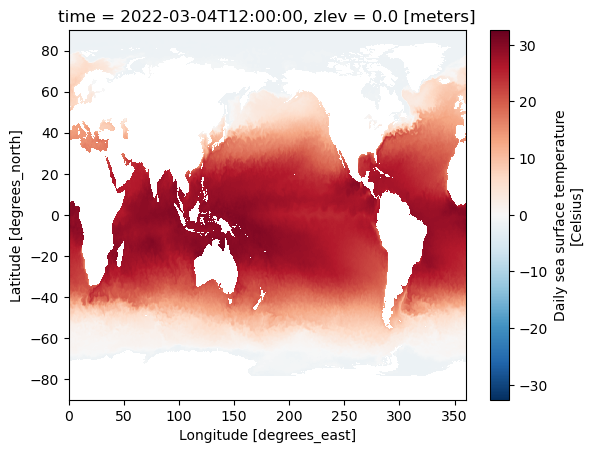

In [31]:
sst['sst'].plot()

What a lovely dataset! 🙂 🌊 🌡